In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from scipy import constants
# import oct2py

# rk4 only works for 1st order DE

G = constants.G
c = constants.speed_of_light

m = 1 #1.989 * 10**30              # mass of the sun in kg
M = 2 #10**6 * m                   # mass of BH

L = 100

A = 1 # G*M
B = 0.005 #L**2 / m**2
C = 0.8 #3*G*M*L**2 / (m*c**2)


x0 = 5000
vx0 = 1
y0 = 5000
vy0 = 1
t = np.linspace(0,1000,1000)

t0 = t[0]

h = len(t)

# function to be solved: dy/dx = x + y
def f1(t,r,v):
    return v

def f2(t,r,v, k=1, m=1):
    return (-k/m)*r

# du/dx = f(x)
def v_(t,r,v):
    # r = np.sqrt(x**2+y**2)
    return -A/(r**2)+B/(r**3)-C/(r**4)

def r_(t,r,v):
    return v

# def motion_x(t,x,vx):
#     return 500-t

# def motion_y(t,y,vy):
#     return (0*y+x0)

'''
Zweiter Versuch
'''

x = np.zeros(len(t))
vx = np.zeros(len(t))
y = np.ones(len(t))
vy = np.zeros(len(t))
x[0] = x0
vx[0] = vx0
y[0] = y0
vy[0] = vy0


def rk4(h = 0.05):
    for i in range(0,len(t)-1):
        k1r = (f1(t[i], r[i], v[i]))
        k1v = (f2(t[i], r[i], v[i]))
        k2r = (f1(t[i]+ h/2, r[i] + h*k1r/2, v[i] + h*k1v/2))
        k2v = (f2(t[i]+ h/2, r[i] + h*k1r/2, v[i] + h*k1v/2))
        k3r = (f1(t[i]+ h/2, r[i] + h*k2r/2, v[i] + h*k2v/2))
        k3v = (f2(t[i]+ h/2, r[i] + h*k2r/2, v[i] + h*k2v/2))
        k4r = (f1(t[i]+ h, r[i] + h*k3r/2, v[i] + h*k3v/2))
        k4v = (f2(t[i]+ h, r[i] + h*k3r/2, v[i] + h*k3v/2))
        print(k1r, k2r, k3r, k4r)
        r[i+1]  = r[i] + (k1r+2*k2r+2*k3r+k4r)*h/6
        v[i+1]  = v[i] + (k1v+2*k2v+2*k3v+k4v)*h/6
        # rn = r0 + kr
        # vn = v0 + kv
    return v, r

def my_rk4(h = 0.07):
    x = np.zeros(len(t))
    vx = np.zeros(len(t))
    y = np.zeros(len(t))
    vy = np.zeros(len(t))
    x[0] = x0
    vx[0] = vx0
    y[0] = y0
    vy[0] = vy0
    for i in range(0,len(t)-1):
        k1x = (motion_x(t[i], x[i], vx[i]))
        k1vx = (v_(t[i], x[i], vx[i]))
        k2x = (motion_x(t[i]+ h/2, x[i] + h*k1x/2, vx[i] + h*k1vx/2))
        k2vx = (v_(t[i]+ h/2, x[i] + h*k1x/2, vx[i] + h*k1vx/2))
        k3x = (motion_x(t[i]+ h/2, x[i] + h*k2x/2, vx[i] + h*k2vx/2))
        k3vx = (v_(t[i]+ h/2, x[i] + h*k2x/2, vx[i] + h*k2vx/2))
        k4x = (motion_x(t[i]+ h, x[i] + h*k3x/2, vx[i] + h*k3vx/2))
        k4vx = (v_(t[i]+ h, x[i] + h*k3x/2, vx[i] + h*k3vx/2))
        x[i+1]  = x[i] + (k1x+2*k2x+2*k3x+k4x)*h/6
        vx[i+1]  = vx[i] + (k1vx+2*k2vx+2*k3vx+k4vx)*h/6
        if x[i] <= 0:
            x[i] = 0
            x = x[:i]
            vx = vx[:i]
            break
            
        k1y = (motion_y(t[i], y[i], vy[i]))
        k1vy = (v_(t[i], y[i], vy[i]))
        k2y = (motion_y(t[i]+ h/2, y[i] + h*k1y/2, vy[i] + h*k1vy/2))
        k2vy = (v_(t[i]+ h/2, y[i] + h*k1y/2, vy[i] + h*k1vy/2))
        k3y = (motion_y(t[i]+ h/2, y[i] + h*k2y/2, vy[i] + h*k2vy/2))
        k3vy = (v_(t[i]+ h/2, y[i] + h*k2y/2, vy[i] + h*k2vy/2))
        k4y = (motion_y(t[i]+ h, y[i] + h*k3y/2, vy[i] + h*k3vy/2))
        k4vy = (v_(t[i]+ h, y[i] + h*k3y/2, vy[i] + h*k3vy/2))
        #print(k1r, k2r, k3r, k4r)
        y[i+1]  = y[i] + (k1y+2*k2y+2*k3y+k4y)*h/6
        vy[i+1]  = vy[i] + (k1vy+2*k2vy+2*k3vy+k4vy)*h/6
        if y[i] <= 0:
            y[i] = 0
            y = y[:i]
            vy = vy[:i]
            break
    return vx, x, vy,y


v_res, r_res = rk4()
print(np.shape(v_res), np.shape(r_res))

# my_vx, my_x,my_vy,my_y = my_rk4()
# print(len(my_vx), len(my_x),len(my_vy),len(my_y))

1000 1000 1000 1000


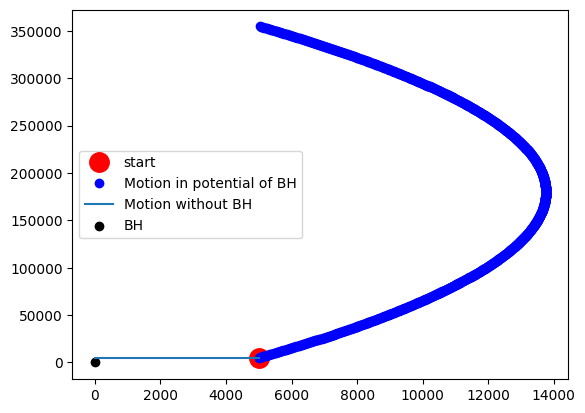

In [2]:
plt.plot(x0,y0,"ro",markersize=14,label="start")
plt.plot(my_x,my_y,"bo",label="Motion in potential of BH")
plt.scatter(0,0,marker="o",color="black",label="BH")
plt.plot(y,motion_y(t,y,vy),label="Motion without BH")
plt.legend()
plt.show()

This is not quite what we shoulod get... It looks like the BH repulse the star. I'm looking into it.